In [24]:
import sys
import pymdp.agent as a
import pymdp.utils as utils
from pymdp.control import construct_policies

sys.path.insert(0, "../")
from src.toy_agent.WorldEnviroment import WorldEnv
from src.toy_agent.Grid import Grid
from src.toy_agent.utils import *

In [25]:
test_env = WorldEnv(Grid("../src/toy_agent/grids/test_grid.txt"))
A = test_env.get_likelihood_dist()
B = test_env.get_transition_dist()
A.shape, len(B), test_env.state

((5, 5), 5, 0)

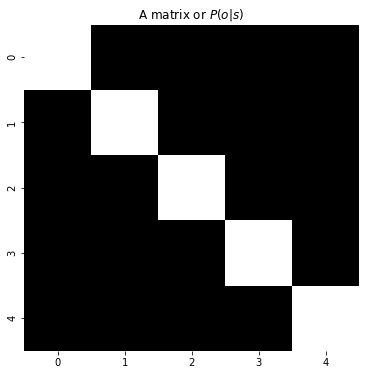

In [26]:
plot_likelihood(A, xlabels=list(range(A.shape[0])), ylabels=list(range(A.shape[1])), title_str = "A matrix or $P(o|s)$")

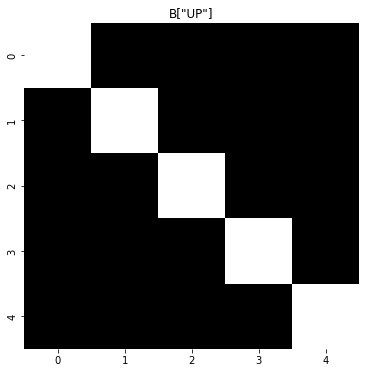

In [27]:
action_mat = B[:, :, 0]
plot_likelihood(action_mat, xlabels=list(range(action_mat.shape[0])), ylabels=list(range(action_mat.shape[1])), title_str = "B[\"UP\"]")

In [53]:
C = utils.onehot(test_env.maze_grid.getGoalState(), test_env.maze_grid.getNumStates())
C = utils.obj_array_uniform(test_env.maze_grid.getNumStates())
plot_beliefs(C, title_str="Preferences")

TypeError: object of type 'int' has no len()

In [54]:
D = utils.onehot(test_env.maze_grid.getStartLocation(), test_env.maze_grid.getNumStates())
D = utils.obj_array_uniform(test_env.maze_grid.getNumStates())
plot_beliefs(D, title_str="Start Location")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
def run_active_inference_loop(my_agent : a.Agent, my_env, T = 5):

  """ Initialize the first observation """
  obs = [my_env.state]
  
  for t in range(T):
    qs = my_agent.infer_states(obs)
    plot_beliefs(qs[0], title_str = f"Beliefs about the context at time {t}")

    q_pi, efe = my_agent.infer_policies()

    print(q_pi, efe)

    chosen_action_id = my_agent.sample_action()

    print(chosen_action_id)

    for action in my_env.actions.keys():
        if my_env.actions[action] == chosen_action_id:
            choice_action = action
            break

    obs = [my_env.step(action)]

    print(f'Action at time {t}: {choice_action}')

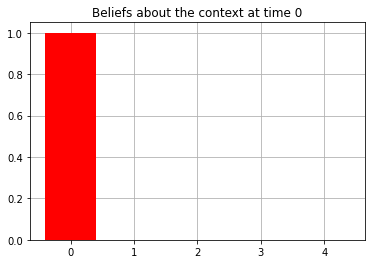

[0.00097656 0.00097656 0.00097656 ... 0.00097656 0.00097656 0.00097656] [-9.52416165 -9.52416165 -9.52416165 ... -9.52416165 -9.52416165
 -9.52416165]
[0.]
Action at time 0: UP


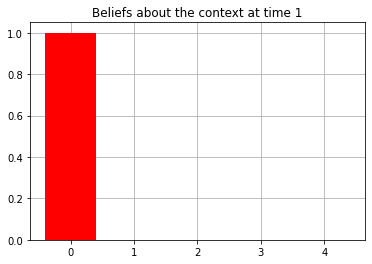

[0.00097656 0.00097656 0.00097656 ... 0.00097656 0.00097656 0.00097656] [-9.52416165 -9.52416165 -9.52416165 ... -9.52416165 -9.52416165
 -9.52416165]
[0.]
Action at time 1: UP


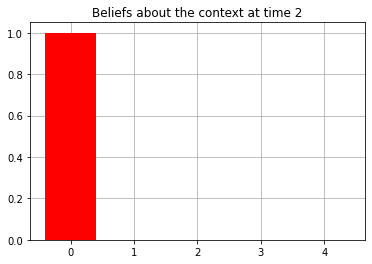

[0.00097656 0.00097656 0.00097656 ... 0.00097656 0.00097656 0.00097656] [-9.52416165 -9.52416165 -9.52416165 ... -9.52416165 -9.52416165
 -9.52416165]
[0.]
Action at time 2: UP


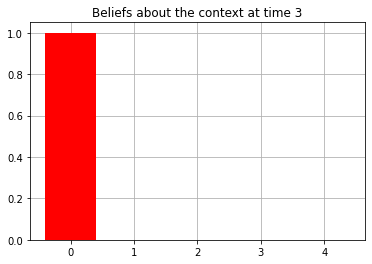

[0.00097656 0.00097656 0.00097656 ... 0.00097656 0.00097656 0.00097656] [-9.52416165 -9.52416165 -9.52416165 ... -9.52416165 -9.52416165
 -9.52416165]
[0.]
Action at time 3: UP


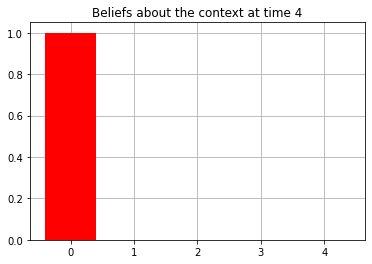

[0.00097656 0.00097656 0.00097656 ... 0.00097656 0.00097656 0.00097656] [-9.52416165 -9.52416165 -9.52416165 ... -9.52416165 -9.52416165
 -9.52416165]
[0.]
Action at time 4: UP


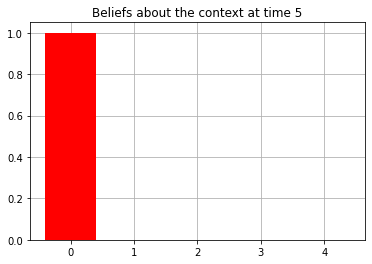

[0.00097656 0.00097656 0.00097656 ... 0.00097656 0.00097656 0.00097656] [-9.52416165 -9.52416165 -9.52416165 ... -9.52416165 -9.52416165
 -9.52416165]
[0.]
Action at time 5: UP


In [ ]:
agent = a.Agent(A=A, B=B, C=C, D=D, policy_len=5)
test_env.reset()
run_active_inference_loop(agent, test_env, 6)

In [ ]:
num_obs = [3, 5] # observation modality dimensions
num_states = [3, 2, 2] # hidden state factor dimensions
num_controls = [3, 1, 1] # control state factor dimensions
A_matrix = utils.random_A_matrix(num_obs, num_states) # create sensory likelihood (A matrix)
B_matrix = utils.random_B_matrix(num_states, num_controls) # create transition likelihood (B matrix)

C_vector = utils.obj_array_uniform(num_obs) # uniform preferences

# instantiate a quick agent using your A, B and C arrays
my_agent = a.Agent( A = A_matrix, B = B_matrix, C = C_vector)

# give the agent a random observation and get the optimized posterior beliefs

observation = [1, 4] # a list specifying the indices of the observation, for each observation modality

qs = my_agent.infer_states(observation) # get posterior over hidden states (a multi-factor belief)

# Do active inference

q_pi, neg_efe = my_agent.infer_policies() # return the policy posterior and return (negative) expected free energies of each policy as well

action = my_agent.sample_action() # sample an action

print(action)

[2. 0. 0.]
